<a href="https://colab.research.google.com/github/choisooyeon007/hello-world/blob/master/study_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy as sp
from scipy import stats
import sklearn as sk
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.tree import DecisionTreeClassifier


In [69]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data[:, 2:]
y = data.target
feature_names = data.feature_names[2:]
print(feature_names)

print(X.shape)
print(y.shape)

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X, y)

['petal length (cm)', 'petal width (cm)']
(150, 2)
(150,)


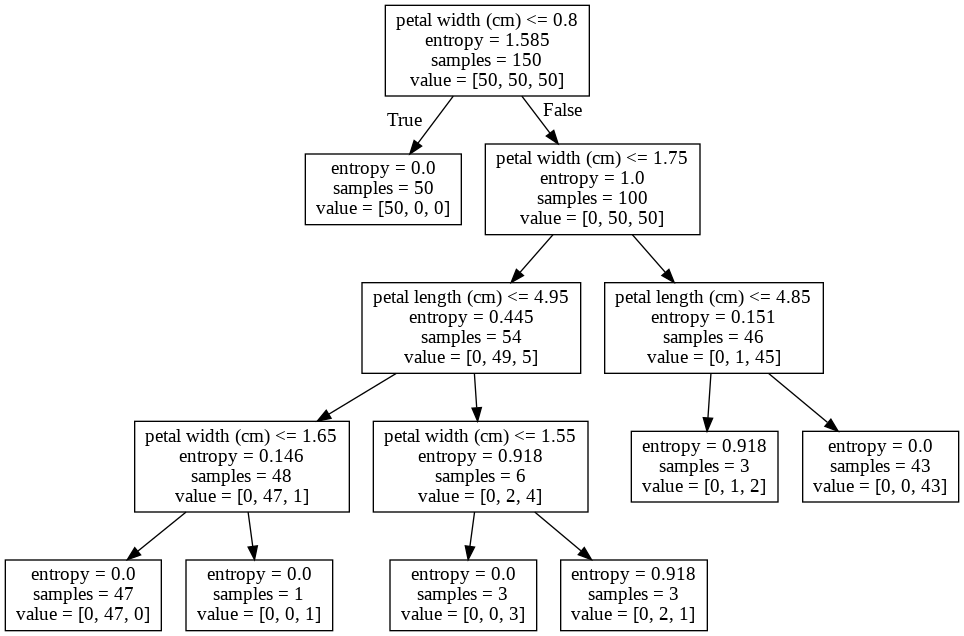

In [70]:
draw_decision_tree(tree1)

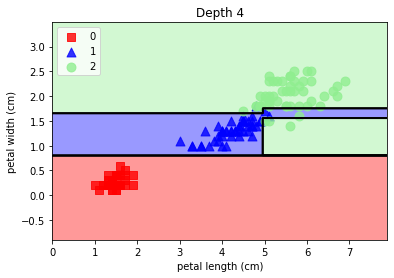

In [71]:
plot_decision_regions(X, y, tree1, "Depth 4")
plt.show()

In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, tree1.predict(X))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]])